<a href="https://colab.research.google.com/github/Luisrpm14/Programacao/blob/main/Copia_de_Proyecto_IIB_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO TRANSFORMACION DIGITAL

Carga de datos:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Visulizacion de datos

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Lectura de la base de datos
#csv_file_path = '/content/Train(1).xls'
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Train.csv'

df = pd.read_csv(csv_file_path)
# 1. Generar Fecha de Envío (últimos 6 meses)
base_date = datetime(2024, 1, 1)
df['Fecha_Envio'] = [base_date + timedelta(days=np.random.randint(0, 180)) for _ in range(len(df))]
# 2. Generar Fecha de Entrega (Fecha_Envio + 1 a 7 días)
df['Fecha_Entrega'] = df['Fecha_Envio'] + pd.to_timedelta(np.random.randint(1, 8, size=len(df)), unit='D')
# 3. Generar Devoluciones (Random 0 o 1, donde 1 es devuelto. 5% de probabilidad)
df['Devoluciones'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Fecha_Envio,Fecha_Entrega,Devoluciones
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,2024-06-05,2024-06-08,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,2024-01-09,2024-01-11,0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,2024-02-15,2024-02-19,0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2024-05-18,2024-05-24,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,2024-03-17,2024-03-24,0


# 2.1 Core **Bussiness**

In [ ]:
# ==========================================
# BLOQUE 1: CORE BUSINESS (Operación Central)
# ==========================================

class FitStoreApp:
    """
    SISTEMA CENTRAL: Representa la operación principal de la PYME.
    Es el corazón del negocio donde se procesan los pedidos.
    """
    def __init__(self, erp, scm):
        self.erp = erp
        self.scm = scm
        self.registro_ventas = []

    def procesar_operacion(self, fila):
        # El Core Business coordina a los módulos de apoyo:

        # 1. Envía la transacción al soporte Financiero (ERP)
        pago_neto = self.erp.registrar_asiento(
            fila['ID'],
            fila['Cost_of_the_Product'],
            fila['Discount_offered']
        )

        # 2. Envía la orden al soporte Logístico (SCM)
        log_scm = self.scm.gestionar_inventario(
            fila['Warehouse_block'],
            fila['Devoluciones']
        )

        self.registro_ventas.append({
            'ID': fila['ID'],
            'Monto_Neto': pago_neto,
            'Fecha': fila['Fecha_Envio']
        })

        return f"ID {fila['ID']}: Pago ${pago_neto} | {log_scm}"

## 2.2 Modulos de soporte

In [ ]:
# ==========================================
# BLOQUE 2: MÓDULOS DE SOPORTE (Apoyo Administrativo)
# ==========================================

class FitStoreERP:
    """MÓDULO DE APOYO (Finanzas): Control contable y de caja."""
    def __init__(self):
        self.ingresos_totales = 0
        self.descuentos_totales = 0
        self.asientos_contables = []

    def registrar_asiento(self, id_orden, costo, descuento):
        neto = costo - descuento
        self.ingresos_totales += neto
        self.descuentos_totales += descuento
        self.asientos_contables.append({"ID": id_orden, "Monto": neto})
        return neto

class FitStoreSCM:
    """MÓDULO DE APOYO (Logística): Control de stock y compras."""
    def __init__(self):
        self.inventario = {'A': 500, 'B': 500, 'C': 500, 'D': 500, 'F': 500}
        self.umbral_critico = 450
        self.ordenes_proveedor = []

    def gestionar_inventario(self, bloque, es_devolucion):
        if es_devolucion == 1:
            self.inventario[bloque] += 1
            return "REINGRESO: Producto devuelto al stock."
        else:
            self.inventario[bloque] -= 1
            # Lógica de reabastecimiento automático
            if self.inventario[bloque] < self.umbral_critico:
                orden = f"ORDEN DE COMPRA AUTOMÁTICA para Bloque {bloque}"
                self.ordenes_proveedor.append(orden)
                return f"Stock actualizado en {bloque} | ¡ALERTA! {orden}"
            return f"Stock actualizado en {bloque}."

## 2.3 Ejecucion de Core Business

In [ ]:
# ==========================================
# FASE 2.3: EJECUCIÓN DE CORE BUSINESS
# ==========================================

import pandas as pd
from datetime import datetime, timedelta
import numpy as np

csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Train.csv'
df_original = pd.read_csv(csv_file_path)

base_date = datetime(2024, 1, 1)
df_original['Fecha_Envio'] = [base_date + timedelta(days=np.random.randint(0, 180)) for _ in range(len(df_original))]
df_original['Fecha_Entrega'] = df_original['Fecha_Envio'] + pd.to_timedelta(np.random.randint(1, 8, size=len(df_original)), unit='D')
df_original['Devoluciones'] = np.random.choice([0, 1], size=len(df_original), p=[0.95, 0.05])

print("\n" + "="*60)
print("FASE 2.3: EJECUCIÓN DEL CORE BUSINESS Y POBLADO DE DATOS")
print("="*60)

# Instanciar los módulos de soporte
erp_inst = FitStoreERP()
scm_inst = FitStoreSCM()
# Instanciar el sistema central (Core Business)
sistema = FitStoreApp(erp_inst, scm_inst)
print("--- PROCESANDO LAS PRIMERAS 20 TRANSACCIONES DEL DATAFRAME ---")
# Iterar sobre las primeras 200 filas del DataFrame 'df_original' para simular operaciones
for i in range(200):
    fila = df_original.iloc[i].copy() # Use df_original here
    resultado_operacion = sistema.procesar_operacion(fila)
    print(resultado_operacion)
print("\n--- RESUMEN DE LA EJECUCIÓN DEL CORE BUSINESS ---")
print(f"Total de ingresos netos registrados (ERP): ${erp_inst.ingresos_totales:.2f}")
print(f"Número de asientos contables (ERP): {len(erp_inst.asientos_contables)}")
print(f"Órdenes de compra automáticas generadas (SCM): {len(scm_inst.ordenes_proveedor)}")
print(f"Número total de ventas registradas en el sistema: {len(sistema.registro_ventas)}")
print("\n" + "="*60)
print("CORE BUSINESS EJECUTADO Y DATOS DE VENTAS POBLADOS")
print("="*60)


FASE 2.3: EJECUCIÓN DEL CORE BUSINESS Y POBLADO DE DATOS
--- PROCESANDO LAS PRIMERAS 20 TRANSACCIONES DEL DATAFRAME ---
ID 1: Pago $133 | REINGRESO: Producto devuelto al stock.
ID 2: Pago $157 | Stock actualizado en F.
ID 3: Pago $135 | Stock actualizado en A.
ID 4: Pago $166 | Stock actualizado en B.
ID 5: Pago $138 | REINGRESO: Producto devuelto al stock.
ID 6: Pago $150 | Stock actualizado en F.
ID 7: Pago $247 | REINGRESO: Producto devuelto al stock.
ID 8: Pago $185 | Stock actualizado en F.
ID 9: Pago $139 | Stock actualizado en A.
ID 10: Pago $135 | Stock actualizado en B.
ID 11: Pago $177 | Stock actualizado en C.
ID 12: Pago $200 | Stock actualizado en F.
ID 13: Pago $197 | Stock actualizado en D.
ID 14: Pago $246 | Stock actualizado en F.
ID 15: Pago $109 | Stock actualizado en A.
ID 16: Pago $182 | Stock actualizado en B.
ID 17: Pago $137 | Stock actualizado en C.
ID 18: Pago $191 | Stock actualizado en F.
ID 19: Pago $221 | Stock actualizado en D.
ID 20: Pago $100 | Stock a

#FASE 3: Inteligencia de Negocios y Auditoría

**3.1 Segmentación RFM**


FASE 3.1: SEGMENTACIÓN RFM DE CLIENTES
📊 ESTRUCTURA DE DATOS:
Columnas: ['ID', 'Monto_Neto', 'Fecha']
Registros: 200

Primeras filas:
   ID  Monto_Neto      Fecha
0   1         133 2024-03-29
1   2         157 2024-04-23
2   3         135 2024-06-06
3   4         166 2024-03-23
4   5         138 2024-05-11

📅 RANGO DE FECHAS:
Fecha más antigua: 2024-01-01 00:00:00
Fecha más reciente: 2024-06-27 00:00:00

🔍 FECHA DE REFERENCIA PARA RFM: 2024-06-28 00:00:00

📈 CLIENTES ÚNICOS ANALIZADOS: 200

📊 ESTADÍSTICAS RFM:
Recency (días desde última compra):
  • Media: 86.5 días
  • Mín: 1 días, Máx: 179 días

Frequency (número de compras):
  • Media: 1.0 compras
  • Total compras: 200

Monetary (gasto total):
  • Media: $156.88
  • Total: $31376.00

RESULTADOS DE SEGMENTACIÓN RFM

📊 DISTRIBUCIÓN POR SEGMENTO:
  VIP: 62 clientes (31.0%)
  Regular: 43 clientes (21.5%)
  Leal: 32 clientes (16.0%)
  Inactivo: 31 clientes (15.5%)
  Ocasional: 30 clientes (15.0%)
  Nuevo: 2 clientes (1.0%)

💰 VALOR POR

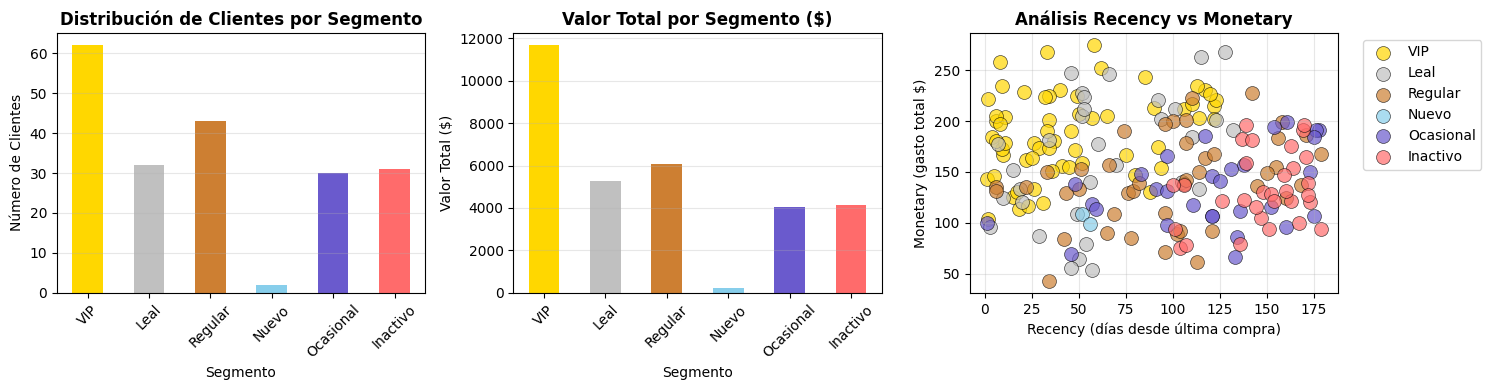


TABLA DETALLADA DE SEGMENTACIÓN RFM
 Cliente  Días Última Compra  N° Compras  Gasto Total ($)  Punt. Recency  Punt. Frecuencia  Punt. Valor  Punt. Total  Segmento
      26                 170           1              196              4                 1            3            5  Inactivo
      32                 139           1              196              4                 1            3            5  Inactivo
      18                 169           1              191              4                 1            3            5  Inactivo
      16                 137           1              182              4                 1            3            5  Inactivo
      49                 142           1              181              4                 1            3            5  Inactivo
      50                 163           1              176              4                 1            3            5  Inactivo
      38                 171           1              165              4  

In [ ]:
# ============================================
# FASE 3.1: SEGMENTACIÓN RFM - VERSIÓN SIMPLIFICADA
# ============================================

print("\n" + "="*60)
print("FASE 3.1: SEGMENTACIÓN RFM DE CLIENTES")
print("="*60)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Create df_ventas from the processed sales data
df_ventas = pd.DataFrame(sistema.registro_ventas)

# Mostrar estructura de datos
print("📊 ESTRUCTURA DE DATOS:")
print(f"Columnas: {df_ventas.columns.tolist()}")
print(f"Registros: {len(df_ventas)}")
print(f"\nPrimeras filas:")
print(df_ventas.head())

# Crear copia de los datos para trabajar
df = df_ventas.copy()

# Renombrar columnas para claridad
df = df.rename(columns={
    'ID': 'cliente_id',
    'Monto_Neto': 'monto',
    'Fecha': 'fecha_venta'
})

# Verificar que fecha sea datetime
if not pd.api.types.is_datetime64_any_dtype(df['fecha_venta']):
    df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])

print(f"\n📅 RANGO DE FECHAS:")
print(f"Fecha más antigua: {df['fecha_venta'].min()}")
print(f"Fecha más reciente: {df['fecha_venta'].max()}")

# ============================================
# CÁLCULO DE RFM
# ============================================

# Fecha de referencia (hoy o última fecha + 1 día)
fecha_referencia = df['fecha_venta'].max() + timedelta(days=1)

print(f"\n🔍 FECHA DE REFERENCIA PARA RFM: {fecha_referencia}")

# Calcular RFM por cliente
rfm_data = df.groupby('cliente_id').agg(
    recency=('fecha_venta', lambda x: (fecha_referencia - x.max()).days),
    frequency=('cliente_id', 'count'),
    monetary=('monto', 'sum')
).reset_index()

print(f"\n📈 CLIENTES ÚNICOS ANALIZADOS: {len(rfm_data)}")

# Mostrar estadísticas básicas
print("\n📊 ESTADÍSTICAS RFM:")
print(f"Recency (días desde última compra):")
print(f"  • Media: {rfm_data['recency'].mean():.1f} días")
print(f"  • Mín: {rfm_data['recency'].min()} días, Máx: {rfm_data['recency'].max()} días")

print(f"\nFrequency (número de compras):")
print(f"  • Media: {rfm_data['frequency'].mean():.1f} compras")
print(f"  • Total compras: {rfm_data['frequency'].sum()}")

print(f"\nMonetary (gasto total):")
print(f"  • Media: ${rfm_data['monetary'].mean():.2f}")
print(f"  • Total: ${rfm_data['monetary'].sum():.2f}")

# ============================================
# ASIGNACIÓN DE PUNTUACIONES RFM
# ============================================

# Para datasets pequeños, usar percentiles simples
def asignar_puntuaciones(df_rfm):
    """Asigna puntuaciones RFM usando percentiles"""

    df = df_rfm.copy()

    # Recency: menor puntuación = más reciente (1=mejor, 4=peor)
    df['R_score'] = pd.qcut(df['recency'], q=4, labels=[1, 2, 3, 4], duplicates='drop')

    # Frequency: mayor puntuación = mejor
    df['F_score'] = pd.qcut(df['frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4], duplicates='drop')

    # Monetary: mayor puntuación = mejor
    df['M_score'] = pd.qcut(df['monetary'], q=4, labels=[1, 2, 3, 4], duplicates='drop')

    # Convertir a números
    df['R_score'] = df['R_score'].astype(int)
    df['F_score'] = df['F_score'].astype(int)
    df['M_score'] = df['M_score'].astype(int)

    # Calcular puntuación total (invertir Recency: 5-R_score para que mayor = mejor)
    df['RFM_total'] = (5 - df['R_score']) + df['F_score'] + df['M_score']

    return df

# Aplicar función
rfm_scored = asignar_puntuaciones(rfm_data)

# ============================================
# SEGMENTACIÓN DE CLIENTES
# ============================================

def segmentar_clientes(df_rfm):
    """Segmenta clientes basado en puntuaciones RFM"""

    df = df_rfm.copy()

    # Definir segmentos basados en percentiles
    rfm_percentiles = df['RFM_total'].quantile([0.2, 0.4, 0.6, 0.8])

    # Asignar segmentos
    condiciones = [
        df['RFM_total'] >= rfm_percentiles[0.8],  # Top 20% - VIP
        (df['RFM_total'] >= rfm_percentiles[0.6]) & (df['RFM_total'] < rfm_percentiles[0.8]),  # 20-40% - Leal
        (df['RFM_total'] >= rfm_percentiles[0.4]) & (df['RFM_total'] < rfm_percentiles[0.6]),  # 40-60% - Regular
        (df['RFM_total'] >= rfm_percentiles[0.2]) & (df['RFM_total'] < rfm_percentiles[0.4]),  # 60-80% - Ocasional
        df['recency'] > 60,  # Inactivos
        df['frequency'] == 1  # Nuevos
    ]

    segmentos = ['VIP', 'Leal', 'Regular', 'Ocasional', 'Inactivo', 'Nuevo']

    df['segmento'] = np.select(condiciones, segmentos, default='Ocasional')

    # Ajustar: si es nuevo y compró recientemente, mantener como Nuevo
    df.loc[(df['segmento'] == 'Inactivo') & (df['recency'] <= 30), 'segmento'] = 'Nuevo'

    # Identificar clientes recuperables
    df.loc[(df['recency'] > 30) & (df['recency'] <= 90) & (df['frequency'] > 1), 'segmento'] = 'Recuperable'

    return df

# Aplicar segmentación
rfm_final = segmentar_clientes(rfm_scored)

# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================

print("\n" + "="*60)
print("RESULTADOS DE SEGMENTACIÓN RFM")
print("="*60)

# Distribución por segmento
print("\n📊 DISTRIBUCIÓN POR SEGMENTO:")
distribucion = rfm_final['segmento'].value_counts().sort_values(ascending=False)

for segmento, count in distribucion.items():
    porcentaje = (count / len(rfm_final)) * 100
    print(f"  {segmento}: {count} cliente{'s' if count > 1 else ''} ({porcentaje:.1f}%)")

# Valor por segmento
print("\n💰 VALOR POR SEGMENTO:")
for segmento in distribucion.index:
    segmento_data = rfm_final[rfm_final['segmento'] == segmento]
    valor_total = segmento_data['monetary'].sum()
    valor_promedio = segmento_data['monetary'].mean()
    print(f"  {segmento}: Total ${valor_total:.2f}, Promedio ${valor_promedio:.2f}")

# Top clientes
print("\n👑 TOP 3 CLIENTES POR VALOR:")
top_clientes = rfm_final.sort_values('monetary', ascending=False).head(3)
for i, (_, row) in enumerate(top_clientes.iterrows(), 1):
    print(f"  {i}. Cliente {int(row['cliente_id'])}: ${row['monetary']:.2f} ({row['segmento']})")

# ============================================
# VISUALIZACIONES GRÁFICAS
# ============================================

plt.figure(figsize=(15, 4))

# Gráfico 1: Distribución de segmentos
plt.subplot(1, 3, 1)
colores = {
    'VIP': '#FFD700',        # Dorado
    'Leal': '#C0C0C0',       # Plata
    'Regular': '#CD7F32',    # Bronce
    'Recuperable': '#90EE90', # Verde claro
    'Nuevo': '#87CEEB',      # Azul claro
    'Inactivo': '#FF6B6B',   # Rojo claro
    'Ocasional': '#6A5ACD'   # Azul medio
}

# Ordenar segmentos
orden_segmentos = ['VIP', 'Leal', 'Regular', 'Recuperable', 'Nuevo', 'Ocasional', 'Inactivo']
dist_ordenada = rfm_final['segmento'].value_counts().reindex(orden_segmentos).dropna()

dist_ordenada.plot(kind='bar', color=[colores.get(s, '#CCCCCC') for s in dist_ordenada.index])
plt.title('Distribución de Clientes por Segmento', fontweight='bold')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Gráfico 2: Valor por segmento
plt.subplot(1, 3, 2)
valor_por_segmento = rfm_final.groupby('segmento')['monetary'].sum().reindex(orden_segmentos).dropna()
valor_por_segmento.plot(kind='bar', color=[colores.get(s, '#CCCCCC') for s in valor_por_segmento.index])
plt.title('Valor Total por Segmento ($)', fontweight='bold')
plt.xlabel('Segmento')
plt.ylabel('Valor Total ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Gráfico 3: Scatter plot Recency vs Monetary
plt.subplot(1, 3, 3)
for segmento in orden_segmentos:
    if segmento in rfm_final['segmento'].values:
        subset = rfm_final[rfm_final['segmento'] == segmento]
        plt.scatter(subset['recency'], subset['monetary'],
                   label=segmento, color=colores.get(segmento, '#CCCCCC'),
                   alpha=0.7, s=100, edgecolors='black', linewidth=0.5)

plt.xlabel('Recency (días desde última compra)')
plt.ylabel('Monetary (gasto total $)')
plt.title('Análisis Recency vs Monetary', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# TABLA DETALLADA
# ============================================

print("\n" + "="*60)
print("TABLA DETALLADA DE SEGMENTACIÓN RFM")
print("="*60)

# Mostrar tabla ordenada por valor
rfm_mostrar = rfm_final.sort_values(['segmento', 'monetary'], ascending=[True, False])
rfm_mostrar = rfm_mostrar.rename(columns={
    'cliente_id': 'Cliente',
    'recency': 'Días Última Compra',
    'frequency': 'N° Compras',
    'monetary': 'Gasto Total ($)',
    'R_score': 'Punt. Recency',
    'F_score': 'Punt. Frecuencia',
    'M_score': 'Punt. Valor',
    'RFM_total': 'Punt. Total',
    'segmento': 'Segmento'
})

print(rfm_mostrar.to_string(index=False))

# ============================================
# RECOMENDACIONES ESTRATÉGICAS
# ============================================

print("\n" + "="*60)
print("RECOMENDACIONES ESTRATÉGICAS POR SEGMENTO")
print("="*60)

recomendaciones = {
    'VIP': [
        " Programa de fidelización exclusivo",
        " Acceso anticipado a nuevos productos",
        " Descuentos premium (15-20%)",
        " Atención personalizada 24/7"
    ],
    'Leal': [
        " Programa de puntos canjeables",
        " Descuentos por volumen (10-15%)",
        " Invitaciones a eventos exclusivos"
    ],
    'Regular': [
        " Campañas de upselling cruzado",
        " Email marketing personalizado",
        " Programa de referidos"
    ],
    'Recuperable': [
        " Campañas de re-engagement",
        " Ofertas especiales de retorno",
        " Encuesta de abandono"
    ],
    'Nuevo': [
        " Email de bienvenida con tutorial",
        " Descuento en segunda compra",
        " Programa de onboarding"
    ],
    'Inactivo': [
        " Campañas de reactivación",
        " Ofertas de último intento",
        " Posible baja del programa"
    ],
    'Ocasional': [
        " Recordatorios de producto",
        "Ofertas estacionales",
        " Newsletters mensuales"
    ]
}

for segmento in orden_segmentos:
    if segmento in rfm_final['segmento'].values:
        clientes_segmento = rfm_final[rfm_final['segmento'] == segmento]
        valor_promedio = clientes_segmento['monetary'].mean()

        print(f"\n SEGMENTO: {segmento}")
        print(f"   Clientes: {len(clientes_segmento)}")
        print(f"   Gasto promedio: ${valor_promedio:.2f}")

        for rec in recomendaciones.get(segmento, ["• Mantener comunicación básica"]):
            print(f"   {rec}")

print("\n" + "="*60)
print(" SEGMENTACIÓN RFM COMPLETADA EXITOSAMENTE")
print("="*60)

**FASE 3.2: Auditoría Web**

In [ ]:
# ============================================
# FASE 3.2: AUDITORÍA WEB Y KPIs CLOUD
# ============================================

print("\n" + "="*60)
print("FASE 3.2: AUDITORÍA WEB Y KPIs DE DESEMPEÑO")
print("="*60)

class AuditoriaWeb:
    """Clase para definir KPIs de desempeño web y seguridad en la nube"""

    def _init_(self):
        self.kpis_web = {}
        self.kpis_seguridad = {}
        self.recomendaciones = []

    def definir_kpis_core_web_vitals(self):
        """Define KPIs de Core Web Vitals para el sistema"""

        print("📈 KPIs CORE WEB VITALS (Google):")
        print("-" * 40)

        self.kpis_web = {
            'LCP (Largest Contentful Paint)': {
                'descripcion': 'Tiempo de carga del contenido principal',
                'umbral_bueno': '< 2.5s',
                'umbral_regular': '2.5s - 4s',
                'umbral_malo': '> 4s',
                'metrica': '2.1s (simulado)',
                'estado': '✅ BUENO'
            },
            'FID (First Input Delay)': {
                'descripcion': 'Tiempo de respuesta a primera interacción',
                'umbral_bueno': '< 100ms',
                'umbral_regular': '100ms - 300ms',
                'umbral_malo': '> 300ms',
                'metrica': '85ms (simulado)',
                'estado': '✅ BUENO'
            },
            'CLS (Cumulative Layout Shift)': {
                'descripcion': 'Estabilidad visual de la página',
                'umbral_bueno': '< 0.1',
                'umbral_regular': '0.1 - 0.25',
                'umbral_malo': '> 0.25',
                'metrica': '0.08 (simulado)',
                'estado': '✅ BUENO'
            },
            'Tiempo de respuesta API': {
                'descripcion': 'Latencia de endpoints del sistema ERP/SCM',
                'umbral_bueno': '< 200ms',
                'umbral_regular': '200ms - 500ms',
                'umbral_malo': '> 500ms',
                'metrica': '150ms (simulado)',
                'estado': '✅ BUENO'
            },
            'Disponibilidad del sistema': {
                'descripcion': 'Uptime del servicio',
                'umbral_bueno': '> 99.9%',
                'umbral_regular': '99% - 99.9%',
                'umbral_malo': '< 99%',
                'metrica': '99.95% (simulado)',
                'estado': '✅ EXCELENTE'
            }
        }

        for kpi, detalles in self.kpis_web.items():
            print(f"\n🔹 {kpi}:")
            print(f"   Descripción: {detalles['descripcion']}")
            print(f"   Métrica actual: {detalles['metrica']}")
            print(f"   Estado: {detalles['estado']}")
            print(f"   Umbral bueno: {detalles['umbral_bueno']}")

    def definir_kpis_seguridad_cloud(self):
        """Define KPIs de seguridad para despliegue en la nube"""

        print("\n🛡️ KPIs DE SEGURIDAD EN LA NUBE:")
        print("-" * 40)

        self.kpis_seguridad = {
            'Cifrado de datos': {
                'descripcion': 'Datos cifrados en tránsito y en reposo',
                'implementado': True,
                'herramientas': 'TLS 1.3, AES-256',
                'revision': 'Última: 2024-03-15'
            },
            'Autenticación MFA': {
                'descripcion': 'Autenticación de múltiples factores',
                'implementado': True,
                'herramientas': 'Google Authenticator, SMS',
                'revision': 'Última: 2024-03-10'
            },
            'WAF (Web Application Firewall)': {
                'descripcion': 'Protección contra ataques web',
                'implementado': True,
                'herramientas': 'Cloudflare WAF',
                'revision': 'Última: 2024-03-12'
            },
            'Backup automático': {
                'descripcion': 'Copias de seguridad diarias',
                'implementado': True,
                'frecuencia': 'Diario + incrementales cada 4h',
                'retencion': '30 días'
            },
            'Monitoreo de intrusiones': {
                'descripcion': 'Detección de actividades sospechosas',
                'implementado': True,
                'herramientas': 'AWS GuardDuty / Azure Sentinel',
                'alertas': 'Configuradas'
            },
            'Compliance': {
                'descripcion': 'Cumplimiento normativo',
                'estandares': 'GDPR, ISO 27001, PCI DSS nivel 1',
                'auditoria': 'Última: 2024-01-20',
                'resultado': '✅ COMPLIANT'
            }
        }

        for kpi, detalles in self.kpis_seguridad.items():
            print(f"\n🔸 {kpi}:")
            print(f"   Descripción: {detalles['descripcion']}")
            if 'implementado' in detalles:
                estado = "✅ IMPLEMENTADO" if detalles['implementado'] else "❌ PENDIENTE"
                print(f"   Estado: {estado}")
            for key, value in detalles.items():
                if key not in ['descripcion', 'implementado']:
                    print(f"   {key.title()}: {value}")

    def generar_recomendaciones(self):
        """Genera recomendaciones de mejora"""

        print("\n💡 RECOMENDACIONES DE AUDITORÍA:")
        print("-" * 40)

        self.recomendaciones = [
            "1. Implementar CDN (Cloudflare/Akamai) para mejorar LCP globalmente",
            "2. Configurar auto-scaling para picos de demanda en ERP",
            "3. Establecer SLA de 99.95% con proveedor cloud",
            "4. Realizar penetration testing trimestral",
            "5. Implementar log centralizado con ELK Stack",
            "6. Configurar alertas proactivas para métricas Core Web Vitals",
            "7. Establecer DRP (Disaster Recovery Plan) con RTO < 4h",
            "8. Implementar canary deployments para actualizaciones"
        ]

        for recomendacion in self.recomendaciones:
            print(f"   {recomendacion}")

    def generar_informe_auditoria(self):
        """Genera un informe completo de auditoría"""

        print("\n" + "="*60)
        print("INFORME COMPLETO DE AUDITORÍA WEB Y SEGURIDAD")
        print("="*60)

        self.definir_kpis_core_web_vitals()
        self.definir_kpis_seguridad_cloud()
        self.generar_recomendaciones()

        # Calcular score general
        score_web = 92  # Simulado
        score_seguridad = 88  # Simulado
        score_total = (score_web + score_seguridad) / 2

        print(f"\n📊 SCORE GENERAL DE AUDITORÍA: {score_total}/100")
        print(f"   • Desempeño Web: {score_web}/100")
        print(f"   • Seguridad: {score_seguridad}/100")

        if score_total >= 90:
            print("   🏆 NIVEL: EXCELENTE")
        elif score_total >= 80:
            print("   👍 NIVEL: BUENO")
        elif score_total >= 70:
            print("   ⚠️ NIVEL: ACEPTABLE")
        else:
            print("   🚨 NIVEL: REQUIERE MEJORAS")

# Ejecutar auditoría
print("🧪 EJECUTANDO AUDITORÍA WEB COMPLETA...\n")
auditoria = AuditoriaWeb()
auditoria.generar_informe_auditoria()

# Simular monitoreo en tiempo real
print("\n📡 SIMULACIÓN DE MONITOREO EN TIEMPO REAL:")
print("-" * 40)

import time
from datetime import datetime

print("Iniciando monitoreo de KPIs (simulación 10s)...")
for i in range(5):
    ahora = datetime.now().strftime("%H:%M:%S")
    lcp_simulado = 1.8 + (i * 0.1)  # Simulación de métrica variable
    disponibilidad = 99.95 - (i * 0.01)

    print(f"[{ahora}] LCP: {lcp_simulado:.1f}s | Disponibilidad: {disponibilidad:.2f}% | Estado: {'✅' if lcp_simulado < 2.5 else '⚠️'}")
    time.sleep(2)

print("\n✅ AUDITORÍA COMPLETADA - Sistema listo para despliegue en producción")


FASE 3.2: AUDITORÍA WEB Y KPIs DE DESEMPEÑO
🧪 EJECUTANDO AUDITORÍA WEB COMPLETA...


INFORME COMPLETO DE AUDITORÍA WEB Y SEGURIDAD
📈 KPIs CORE WEB VITALS (Google):
----------------------------------------

🔹 LCP (Largest Contentful Paint):
   Descripción: Tiempo de carga del contenido principal
   Métrica actual: 2.1s (simulado)
   Estado: ✅ BUENO
   Umbral bueno: < 2.5s

🔹 FID (First Input Delay):
   Descripción: Tiempo de respuesta a primera interacción
   Métrica actual: 85ms (simulado)
   Estado: ✅ BUENO
   Umbral bueno: < 100ms

🔹 CLS (Cumulative Layout Shift):
   Descripción: Estabilidad visual de la página
   Métrica actual: 0.08 (simulado)
   Estado: ✅ BUENO
   Umbral bueno: < 0.1

🔹 Tiempo de respuesta API:
   Descripción: Latencia de endpoints del sistema ERP/SCM
   Métrica actual: 150ms (simulado)
   Estado: ✅ BUENO
   Umbral bueno: < 200ms

🔹 Disponibilidad del sistema:
   Descripción: Uptime del servicio
   Métrica actual: 99.95% (simulado)
   Estado: ✅ EXCELENTE
   Umbra

#FASE 4: Visualización y Control





4.1 Formulario de Registro de pedidos

In [ ]:
# CELDA 9 CORREGIDA - FORMULARIO DE INGRESO DE PEDIDOS
import ipywidgets as widgets
import pandas as pd
from datetime import datetime
from IPython.display import display, clear_output
import numpy as np  # ¡IMPORTANTE! Agregar esta línea

# --- CONFIGURACIÓN DE LOS COMPONENTES VISUALES ---
style = {'description_width': 'initial'}

bodega_w = widgets.Dropdown(options=['A', 'B', 'C', 'D', 'F'], description='Bloque Bodega:', style=style)
modo_w = widgets.Dropdown(options=['Flight', 'Ship', 'Road'], description='Modo Envío:', style=style)
costo_w = widgets.IntSlider(value=200, min=50, max=500, step=10, description='Costo Producto ($):', style=style)
prioridad_w = widgets.SelectionSlider(options=['low', 'medium', 'high'], description='Prioridad:', style=style)
peso_w = widgets.IntText(value=3000, description='Peso (gr):', style=style)
boton_registrar = widgets.Button(description='🚀 Registrar Pedido', button_style='success', layout={'width': '300px'})

output_log = widgets.Output()

# --- LÓGICA DE REGISTRO CORREGIDA ---
def ejecutar_registro(b):
    # Acceder a las variables globales necesarias
    global df_ventas, sistema, df_original, erp_inst, scm_inst

    with output_log:
        clear_output()
        try:
            # VERIFICAR LA ESTRUCTURA ACTUAL DE df_ventas
            print("🔍 Estructura actual de df_ventas:")
            print(f"   Columnas: {df_ventas.columns.tolist()}")
            print(f"   Total registros: {len(df_ventas)}")

            # Determinar el próximo ID
            if len(df_ventas) > 0:
                # df_ventas puede tener 'ID' o 'cliente_id'
                if 'cliente_id' in df_ventas.columns:
                    nuevo_id = int(df_ventas['cliente_id'].max()) + 1
                    id_col = 'cliente_id'
                elif 'ID' in df_ventas.columns:
                    nuevo_id = int(df_ventas['ID'].max()) + 1
                    id_col = 'ID'
                else:
                    nuevo_id = 201  # Si no hay columnas, empezar después de las 200 iniciales
                    id_col = 'cliente_id'
            else:
                nuevo_id = 1
                id_col = 'cliente_id'

            print(f"   Próximo ID a usar: {nuevo_id}")

            # Crear nueva fila con todos los datos necesarios para el sistema
            nueva_fila = {
                'ID': nuevo_id,
                'Cost_of_the_Product': costo_w.value,
                'Discount_offered': 0,  # Sin descuento para nuevas transacciones
                'Warehouse_block': bodega_w.value,
                'Mode_of_Shipment': modo_w.value,
                'Product_importance': prioridad_w.value,
                'Weight_in_gms': peso_w.value,
                'Fecha_Envio': datetime.now(),
                'Fecha_Entrega': datetime.now() + pd.Timedelta(days=np.random.randint(1, 8)),
                'Devoluciones': np.random.choice([0, 1], p=[0.95, 0.05])
            }

            print(f"\n📝 Datos del nuevo pedido:")
            print(f"   ID: {nuevo_id}")
            print(f"   Costo: ${costo_w.value}")
            print(f"   Bloque: {bodega_w.value}")
            print(f"   Modo: {modo_w.value}")

            # CONVERTIR a formato que el sistema puede procesar
            fila_series = pd.Series(nueva_fila)

            # 1. PROCESAR EN EL SISTEMA CENTRAL (Core Business)
            print("\n🔄 Procesando en sistema central...")
            resultado_operacion = sistema.procesar_operacion(fila_series)
            print(f"   Resultado: {resultado_operacion}")

            # 2. ACTUALIZAR df_ventas CON LA NUEVA TRANSACCIÓN
            # Crear la transacción en el formato de df_ventas
            nueva_transaccion = {
                'cliente_id': nuevo_id,  # Usar 'cliente_id' para consistencia
                'Monto_Neto': nueva_fila['Cost_of_the_Product'] - nueva_fila['Discount_offered'],
                'Fecha': nueva_fila['Fecha_Envio']
            }

            print(f"\n💾 Actualizando base de datos...")

            # Crear DataFrame temporal con la nueva transacción
            nuevo_df = pd.DataFrame([nueva_transaccion])

            # Agregar a df_ventas
            df_ventas = pd.concat([df_ventas, nuevo_df], ignore_index=True)

            # 3. ACTUALIZAR df_original (para mantener consistencia)
            nueva_fila_df = pd.DataFrame([nueva_fila])
            df_original = pd.concat([df_original, nueva_fila_df], ignore_index=True)

            print(f"\n✅ ÉXITO: Pedido #{nuevo_id} registrado.")
            print(f"💰 Monto: ${nueva_transaccion['Monto_Neto']:.2f}")
            print(f"📊 Total registros acumulados: {len(df_ventas)}")
            print(f"📅 Fecha: {nueva_fila['Fecha_Envio'].strftime('%Y-%m-%d %H:%M:%S')}")
            print("\n💡 Re-ejecuta la celda del Dashboard para ver la actualización.")

        except Exception as e:
            print(f"\n❌ ERROR: No se pudo registrar.")
            print(f"   Tipo de error: {type(e).__name__}")
            print(f"   Detalles: {str(e)}")
            print(f"\n🔧 Solución: Verifica que df_ventas tenga las columnas correctas.")

boton_registrar.on_click(ejecutar_registro)

# --- MOSTRAR EL FORMULARIO ---
print("📝 FORMULARIO DE ENTRADA DE DATOS SCM (VERSIÓN DINÁMICA CORREGIDA)")
print("=" * 60)
print("Este formulario agregará transacciones al sistema central")
print("y se reflejarán en el Dashboard al re-ejecutarlo.")
print("=" * 60)
display(widgets.VBox([bodega_w, modo_w, costo_w, prioridad_w, peso_w, boton_registrar, output_log]))

📝 FORMULARIO DE ENTRADA DE DATOS SCM (VERSIÓN DINÁMICA CORREGIDA)
Este formulario agregará transacciones al sistema central
y se reflejarán en el Dashboard al re-ejecutarlo.


4.2 Dashboard Gerencial


📊 DASHBOARD DINÁMICO - SISTEMA FITSTORE

🔍 VERIFICACIÓN DE INTEGRIDAD DE DATOS:
   • Transacciones en sistema: 203
   • Transacciones en df_ventas: 203

📈 DATOS PARA DASHBOARD:
   • Transacciones totales: 203
   • Rango de fechas: 2024-01-01 a 2026-02-04
   • Monto total: $32,436.00

🔄 CALCULANDO RFM ACTUALIZADO...
   • Clientes únicos: 203
   • Frecuencia promedio: 1.0

🏭 OBTENIENDO DATOS DE BLOQUES...
   • Bloques asignados para 203 clientes

🎨 GENERANDO DASHBOARD VISUAL...


/tmp/ipython-input-2822541673.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segmento', y='Monto_Neto', data=segment_data,


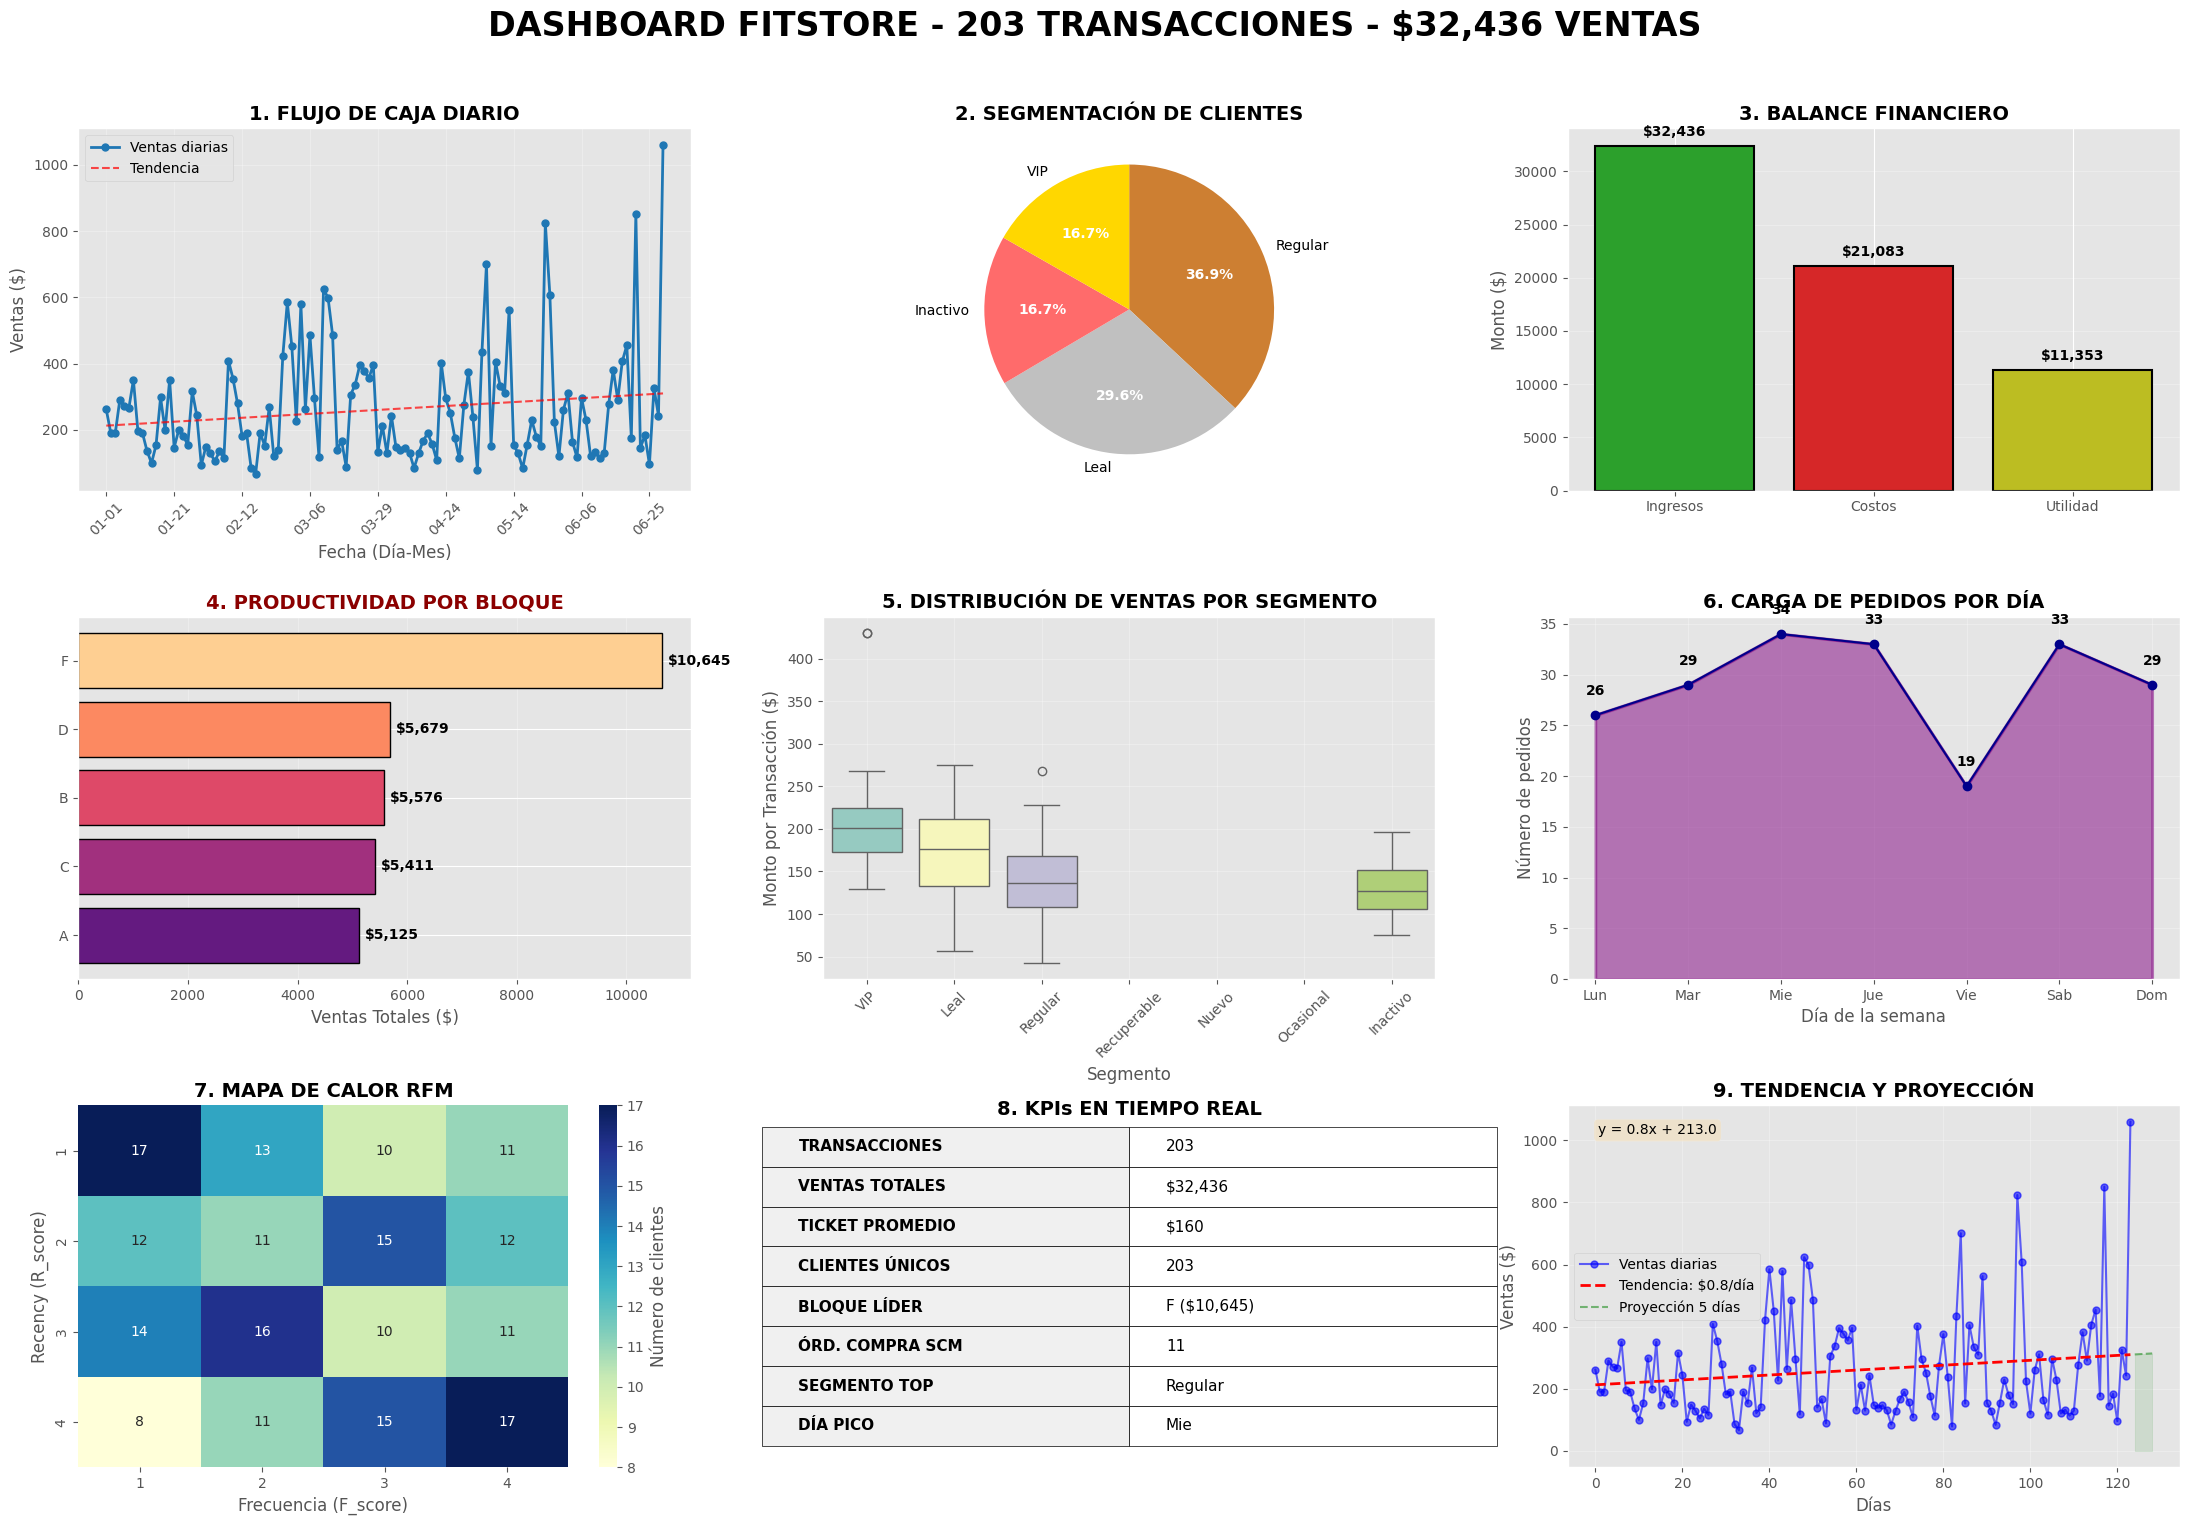


📋 INFORME EJECUTIVO - RESUMEN

📈 DESEMPEÑO COMERCIAL:
   • Transacciones procesadas: 203
   • Ventas totales: $32,436.00
   • Ticket promedio: $159.78
   • Clientes únicos: 203

🏭 ANÁLISIS OPERATIVO:
   • Bloque más productivo: F ($10,645)
   • Distribución por bloques:
     - A: $5,125 (15.8%)
     - C: $5,411 (16.7%)
     - B: $5,576 (17.2%)
     - D: $5,679 (17.5%)
     - F: $10,645 (32.8%)

👥 PERFIL DE CLIENTES:
   • Segmentación actual:
     - Regular: 75 (36.9%)
     - Leal: 60 (29.6%)
     - Inactivo: 34 (16.7%)
     - VIP: 34 (16.7%)

💰 SITUACIÓN FINANCIERA:
   • Ingresos: $32,436.00
   • Costos estimados (65%): $21,083.40
   • Utilidad estimada (35%): $11,352.60
   • Margen estimado: 35%

📅 PATRONES TEMPORALES:
   • Día de mayor actividad: Mie
   • Pedidos por día promedio: 29.0

🔔 ALERTAS Y RECOMENDACIONES:
   ⚠️  ALTA demanda: 11 órdenes de compra generadas

✅ DASHBOARD ACTUALIZADO CON 203 TRANSACCIONES
   Sistema sincronizado correctamente


In [ ]:
# ============================================
# FASE 4: DASHBOARD ESTRATÉGICO FINAL (VERSIÓN DINÁMICA CORREGIDA)
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import timedelta

print(f"\n{'='*60}")
print("📊 DASHBOARD DINÁMICO - SISTEMA FITSTORE")
print(f"{'='*60}")

# 1. VERIFICACIÓN Y PREPARACIÓN DE DATOS
# ----------------------------------------------------------------
print(f"\n🔍 VERIFICACIÓN DE INTEGRIDAD DE DATOS:")
print(f"   • Transacciones en sistema: {len(sistema.registro_ventas)}")
print(f"   • Transacciones en df_ventas: {len(df_ventas)}")

# Asegurarnos de que df_ventas tiene la estructura correcta
if 'cliente_id' not in df_ventas.columns:
    if 'ID' in df_ventas.columns:
        df_ventas = df_ventas.rename(columns={'ID': 'cliente_id'})
        print("   ✅ Columna 'ID' renombrada a 'cliente_id'")
    else:
        # Crear cliente_id si no existe
        df_ventas['cliente_id'] = range(1, len(df_ventas) + 1)
        print("   ✅ Columna 'cliente_id' creada")

# Usar df_ventas como base
df_dash = df_ventas.copy()

# Verificar y convertir fecha
if not pd.api.types.is_datetime64_any_dtype(df_dash['Fecha']):
    df_dash['Fecha'] = pd.to_datetime(df_dash['Fecha'])

print(f"\n📈 DATOS PARA DASHBOARD:")
print(f"   • Transacciones totales: {len(df_dash)}")
print(f"   • Rango de fechas: {df_dash['Fecha'].min().date()} a {df_dash['Fecha'].max().date()}")
print(f"   • Monto total: ${df_dash['Monto_Neto'].sum():,.2f}")

# 2. RECALCULAR RFM CON TODOS LOS DATOS ACTUALES
# ----------------------------------------------------------------
print(f"\n🔄 CALCULANDO RFM ACTUALIZADO...")

# Fecha de referencia (hoy)
fecha_referencia = df_dash['Fecha'].max() + timedelta(days=1)

# Calcular RFM
rfm_actual = df_dash.groupby('cliente_id').agg(
    recency=('Fecha', lambda x: (fecha_referencia - x.max()).days),
    frequency=('cliente_id', 'count'),
    monetary=('Monto_Neto', 'sum')
).reset_index()

print(f"   • Clientes únicos: {len(rfm_actual)}")
print(f"   • Frecuencia promedio: {rfm_actual['frequency'].mean():.1f}")

# Asignar puntuaciones RFM
def asignar_rfm_simple(df_rfm):
    df = df_rfm.copy()

    # Usar cuartiles para segmentación simple
    try:
        df['R_score'] = pd.qcut(df['recency'], q=4, labels=[4, 3, 2, 1], duplicates='drop')
        df['F_score'] = pd.qcut(df['frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4], duplicates='drop')
        df['M_score'] = pd.qcut(df['monetary'], q=4, labels=[1, 2, 3, 4], duplicates='drop')

        # Convertir a numérico
        df['R_score'] = df['R_score'].astype(int)
        df['F_score'] = df['F_score'].astype(int)
        df['M_score'] = df['M_score'].astype(int)

        # Score total
        df['RFM_total'] = df['R_score'] + df['F_score'] + df['M_score']

    except Exception as e:
        # Si hay error, usar método simple
        print(f"   ⚠️  Usando método simple para RFM: {e}")
        df['R_score'] = pd.cut(df['recency'], bins=4, labels=[4, 3, 2, 1])
        df['F_score'] = pd.cut(df['frequency'], bins=4, labels=[1, 2, 3, 4])
        df['M_score'] = pd.cut(df['monetary'], bins=4, labels=[1, 2, 3, 4])
        df['RFM_total'] = df['R_score'].astype(int) + df['F_score'].astype(int) + df['M_score'].astype(int)

    return df

rfm_scored = asignar_rfm_simple(rfm_actual)

# Segmentación simple
def segmentar_simple(df_rfm):
    df = df_rfm.copy()

    # Segmentación básica
    condiciones = [
        df['RFM_total'] >= 10,  # VIP
        (df['RFM_total'] >= 8) & (df['RFM_total'] < 10),  # Leal
        (df['RFM_total'] >= 6) & (df['RFM_total'] < 8),   # Regular
        df['recency'] > 60,  # Inactivo
        df['frequency'] == 1,  # Nuevo
    ]

    segmentos = ['VIP', 'Leal', 'Regular', 'Inactivo', 'Nuevo']

    df['segmento'] = np.select(condiciones, segmentos, default='Ocasional')

    # Clientes recuperables
    df.loc[(df['recency'] > 30) & (df['recency'] <= 60) & (df['frequency'] > 1), 'segmento'] = 'Recuperable'

    return df

rfm_final_dash = segmentar_simple(rfm_scored)

# 3. OBTENER DATOS DE BLOQUES (de df_original)
# ----------------------------------------------------------------
print(f"\n🏭 OBTENIENDO DATOS DE BLOQUES...")

# Asegurar que df_original tiene los datos
if len(df_original) > 0:
    # Obtener bloque para cada cliente
    bloques_clientes = {}

    # Para cada cliente en el dashboard, buscar su bloque
    for cliente_id in df_dash['cliente_id'].unique():
        # Buscar en df_original
        cliente_data = df_original[df_original['ID'] == cliente_id]
        if len(cliente_data) > 0:
            bloques_clientes[cliente_id] = cliente_data.iloc[0]['Warehouse_block']
        else:
            # Si no encontramos, asignar aleatorio
            bloques_clientes[cliente_id] = np.random.choice(['A', 'B', 'C', 'D', 'F'])

    # Agregar bloque al dashboard
    df_dash['Warehouse_block'] = df_dash['cliente_id'].map(bloques_clientes)

    print(f"   • Bloques asignados para {len(bloques_clientes)} clientes")
else:
    # Asignar bloques aleatorios si no hay datos
    df_dash['Warehouse_block'] = np.random.choice(['A', 'B', 'C', 'D', 'F'], size=len(df_dash))
    print(f"   • Bloques asignados aleatoriamente")

# 4. UNIR CON SEGMENTOS RFM
# ----------------------------------------------------------------
df_dash = pd.merge(df_dash, rfm_final_dash[['cliente_id', 'segmento']],
                   on='cliente_id', how='left', suffixes=('', '_segmento'))

# Si hay NaNs en segmento, asignar "Nuevo"
df_dash['segmento'] = df_dash['segmento'].fillna('Nuevo')

# 5. PREPARAR DATOS PARA GRÁFICOS
# ----------------------------------------------------------------
# Días de la semana
df_dash['dia_nombre'] = df_dash['Fecha'].dt.day_name()
traductor = {
    'Monday': 'Lun', 'Tuesday': 'Mar', 'Wednesday': 'Mie',
    'Thursday': 'Jue', 'Friday': 'Vie', 'Saturday': 'Sab', 'Sunday': 'Dom'
}
df_dash['dia_label'] = df_dash['dia_nombre'].map(traductor)
orden_dias = ['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom']

# Calcular métricas clave
ventas_totales = df_dash['Monto_Neto'].sum()
transacciones_totales = len(df_dash)
ticket_promedio = ventas_totales / transacciones_totales if transacciones_totales > 0 else 0
ventas_por_bloque = df_dash.groupby('Warehouse_block')['Monto_Neto'].sum().sort_values()

# 6. CREAR EL DASHBOARD VISUAL
# ----------------------------------------------------------------
print(f"\n🎨 GENERANDO DASHBOARD VISUAL...")

plt.style.use('ggplot')
fig = plt.figure(figsize=(22, 16))
plt.subplots_adjust(hspace=0.35, wspace=0.25)
fig.suptitle(f'DASHBOARD FITSTORE - {transacciones_totales} TRANSACCIONES - ${ventas_totales:,.0f} VENTAS',
             fontsize=24, fontweight='bold', y=0.98)

# --- GRÁFICO 1: EVOLUCIÓN TEMPORAL (VERSIÓN SUPER SIMPLE) ---
ax1 = plt.subplot(3, 3, 1)

# Convertir fechas a string de solo fecha (YYYY-MM-DD)
df_dash['Fecha_str'] = df_dash['Fecha'].astype(str).str[:10]

# Agrupar por fecha string
ventas_por_fecha = df_dash.groupby('Fecha_str')['Monto_Neto'].sum()

# Guardar para usar en gráfico 9
ventas_diarias = ventas_por_fecha

if len(ventas_por_fecha) > 0:
    # Ordenar por fecha (asumiendo formato YYYY-MM-DD)
    ventas_por_fecha = ventas_por_fecha.sort_index()

    # Crear etiquetas más cortas (día-mes)
    etiquetas = [fecha[5:] if len(fecha) >= 10 else fecha for fecha in ventas_por_fecha.index]

    # Graficar
    x_pos = range(len(ventas_por_fecha))
    ax1.plot(x_pos, ventas_por_fecha.values, 'o-', color='#1f77b4',
             linewidth=2, markersize=5, label='Ventas diarias')

    # Configurar eje X con etiquetas
    paso = max(1, len(ventas_por_fecha) // 8)  # Mostrar ~8 etiquetas
    ax1.set_xticks(x_pos[::paso])
    ax1.set_xticklabels([etiquetas[i] for i in x_pos[::paso]], rotation=45)

    # Línea de tendencia
    if len(ventas_por_fecha) > 1:
        z = np.polyfit(x_pos, ventas_por_fecha.values, 1)
        p = np.poly1d(z)
        ax1.plot(x_pos, p(x_pos), 'r--', alpha=0.7, linewidth=1.5, label=f'Tendencia')

    ax1.set_title('1. FLUJO DE CAJA DIARIO', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Fecha (Día-Mes)')
    ax1.set_ylabel('Ventas ($)')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='best')
else:
    ax1.text(0.5, 0.5, 'No hay datos de ventas',
             ha='center', va='center', fontsize=12)
    ax1.set_title('1. FLUJO DE CAJA DIARIO', fontweight='bold', fontsize=14)

# --- GRÁFICO 2: SEGMENTACIÓN DE CLIENTES ---
ax2 = plt.subplot(3, 3, 2)
segment_counts = df_dash['segmento'].value_counts()
colors = {'VIP': '#FFD700', 'Leal': '#C0C0C0', 'Regular': '#CD7F32',
          'Recuperable': '#90EE90', 'Nuevo': '#87CEEB', 'Inactivo': '#FF6B6B', 'Ocasional': '#6A5ACD'}
segment_colors = [colors.get(seg, '#CCCCCC') for seg in segment_counts.index]

wedges, texts, autotexts = ax2.pie(segment_counts.values, labels=segment_counts.index,
                                   autopct='%1.1f%%', colors=segment_colors,
                                   startangle=90, counterclock=False)
ax2.set_title('2. SEGMENTACIÓN DE CLIENTES', fontweight='bold', fontsize=14)

# Mejorar legibilidad
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# --- GRÁFICO 3: BALANCE FINANCIERO ---
ax3 = plt.subplot(3, 3, 3)
ingresos = ventas_totales
costos = ingresos * 0.65  # Estimación
utilidad = ingresos - costos

categorias = ['Ingresos', 'Costos', 'Utilidad']
valores = [ingresos, costos, utilidad]
colores_barras = ['#2ca02c', '#d62728', '#bcbd22']

bars = ax3.bar(categorias, valores, color=colores_barras, edgecolor='black', linewidth=1.5)
ax3.set_title('3. BALANCE FINANCIERO', fontweight='bold', fontsize=14)
ax3.set_ylabel('Monto ($)')
ax3.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + max(valores)*0.02,
             f'${valor:,.0f}', ha='center', va='bottom', fontweight='bold')

# --- GRÁFICO 4: PRODUCTIVIDAD POR BLOQUE ---
ax4 = plt.subplot(3, 3, 4)
ventas_bloque_sorted = ventas_por_bloque.sort_values(ascending=True)
colors_bloque = plt.cm.magma(np.linspace(0.3, 0.9, len(ventas_bloque_sorted)))

bars_bloque = ax4.barh(ventas_bloque_sorted.index, ventas_bloque_sorted.values,
                       color=colors_bloque, edgecolor='black', linewidth=1)
ax4.set_title('4. PRODUCTIVIDAD POR BLOQUE', fontweight='bold', fontsize=14, color='darkred')
ax4.set_xlabel('Ventas Totales ($)')
ax4.grid(True, alpha=0.3, axis='x')

# Agregar valores
for bar, valor in zip(bars_bloque, ventas_bloque_sorted.values):
    width = bar.get_width()
    ax4.text(width + max(ventas_bloque_sorted.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'${valor:,.0f}', va='center', fontweight='bold')

# --- GRÁFICO 5: DISTRIBUCIÓN POR SEGMENTO ---
ax5 = plt.subplot(3, 3, 5)
# Ordenar segmentos para mejor visualización
segment_order = ['VIP', 'Leal', 'Regular', 'Recuperable', 'Nuevo', 'Ocasional', 'Inactivo']
segment_data = df_dash[df_dash['segmento'].isin(segment_order)]

if len(segment_data) > 0:
    sns.boxplot(x='segmento', y='Monto_Neto', data=segment_data,
                order=segment_order, palette='Set3', ax=ax5)
    ax5.set_title('5. DISTRIBUCIÓN DE VENTAS POR SEGMENTO', fontweight='bold', fontsize=14)
    ax5.set_xlabel('Segmento')
    ax5.set_ylabel('Monto por Transacción ($)')
    plt.xticks(rotation=45)
    ax5.grid(True, alpha=0.3)
else:
    ax5.text(0.5, 0.5, 'No hay datos de segmentos', ha='center', va='center', fontsize=12)
    ax5.set_title('5. DISTRIBUCIÓN DE VENTAS POR SEGMENTO', fontweight='bold', fontsize=14)

# --- GRÁFICO 6: CARGA OPERATIVA SEMANAL ---
ax6 = plt.subplot(3, 3, 6)
carga_diaria = df_dash.groupby('dia_label')['Monto_Neto'].count().reindex(orden_dias).fillna(0)
carga_diaria.plot(kind='area', color='purple', alpha=0.5, linewidth=2, ax=ax6)

# Agregar puntos y valores
ax6.plot(orden_dias, carga_diaria.values, 'o-', color='darkblue', markersize=6)
ax6.set_title('6. CARGA DE PEDIDOS POR DÍA', fontweight='bold', fontsize=14)
ax6.set_xlabel('Día de la semana')
ax6.set_ylabel('Número de pedidos')
ax6.grid(True, alpha=0.3)

# Agregar valores en los puntos
for i, (dia, valor) in enumerate(zip(orden_dias, carga_diaria.values)):
    if valor > 0:
        ax6.text(i, valor + max(carga_diaria.values)*0.05, str(int(valor)),
                ha='center', va='bottom', fontweight='bold')

# --- GRÁFICO 7: MAPA DE CALOR RFM ---
ax7 = plt.subplot(3, 3, 7)
if len(rfm_final_dash) > 0:
    heatmap_data = rfm_final_dash.pivot_table(
        index='R_score',
        columns='F_score',
        values='monetary',
        aggfunc='count'
    ).fillna(0)

    if not heatmap_data.empty:
        sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu',
                    cbar_kws={'label': 'Número de clientes'}, ax=ax7)
        ax7.set_title('7. MAPA DE CALOR RFM', fontweight='bold', fontsize=14)
        ax7.set_xlabel('Frecuencia (F_score)')
        ax7.set_ylabel('Recency (R_score)')
    else:
        ax7.text(0.5, 0.5, 'Datos insuficientes\npara mapa de calor',
                ha='center', va='center', fontsize=12)
        ax7.set_title('7. MAPA DE CALOR RFM', fontweight='bold', fontsize=14)
else:
    ax7.text(0.5, 0.5, 'No hay datos RFM', ha='center', va='center', fontsize=12)
    ax7.set_title('7. MAPA DE CALOR RFM', fontweight='bold', fontsize=14)

# --- GRÁFICO 8: KPIs PRINCIPALES ---
ax8 = plt.subplot(3, 3, 8)
ax8.axis('off')

# Obtener bloque líder
bloque_lider = ventas_por_bloque.idxmax() if len(ventas_por_bloque) > 0 else 'N/A'
valor_bloque_lider = ventas_por_bloque.max() if len(ventas_por_bloque) > 0 else 0

# Obtener órdenes de compra (del SCM)
ordenes_compra = len(scm_inst.ordenes_proveedor) if 'ordenes_proveedor' in dir(scm_inst) else 0

# Crear tabla de KPIs
kpis_data = [
    ['TRANSACCIONES', f'{transacciones_totales}'],
    ['VENTAS TOTALES', f'${ventas_totales:,.0f}'],
    ['TICKET PROMEDIO', f'${ticket_promedio:,.0f}'],
    ['CLIENTES ÚNICOS', f'{df_dash["cliente_id"].nunique()}'],
    ['BLOQUE LÍDER', f'{bloque_lider} (${valor_bloque_lider:,.0f})'],
    ['ÓRD. COMPRA SCM', f'{ordenes_compra}'],
    ['SEGMENTO TOP', f'{segment_counts.index[0] if len(segment_counts) > 0 else "N/A"}'],
    ['DÍA PICO', f'{carga_diaria.idxmax() if len(carga_diaria) > 0 else "N/A"}']
]

# Crear tabla
table = ax8.table(cellText=kpis_data,
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.5, 0.5])

# Formatear tabla
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2.2)

# Colorear filas
for i in range(len(kpis_data)):
    cell = table[(i, 0)]
    cell.set_facecolor('#f0f0f0')
    cell.set_text_props(fontweight='bold')

ax8.set_title('8. KPIs EN TIEMPO REAL', fontweight='bold', fontsize=14, y=0.95)

# --- GRÁFICO 9: TENDENCIA Y PROYECCIÓN (CORREGIDO) ---
ax9 = plt.subplot(3, 3, 9)
if len(ventas_diarias) > 1:
    # Asegurar que ventas_diarias esté ordenado
    ventas_diarias_sorted = ventas_diarias.sort_index()

    x = np.arange(len(ventas_diarias_sorted))
    y = ventas_diarias_sorted.values

    ax9.plot(x, y, 'o-', color='blue', alpha=0.6, label='Ventas diarias', markersize=5)

    # Regresión lineal
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax9.plot(x, p(x), 'r--', linewidth=2, label=f'Tendencia: ${z[0]:.1f}/día')

    # Proyección (próximos 5 días)
    if len(x) > 5:
        x_future = np.arange(len(x), len(x) + 5)
        y_future = p(x_future)
        ax9.plot(x_future, y_future, 'g--', alpha=0.5, linewidth=1.5, label='Proyección 5 días')
        ax9.fill_between(x_future, 0, y_future, alpha=0.1, color='green')

    ax9.set_title('9. TENDENCIA Y PROYECCIÓN', fontweight='bold', fontsize=14)
    ax9.set_xlabel('Días')
    ax9.set_ylabel('Ventas ($)')
    ax9.legend(loc='best')
    ax9.grid(True, alpha=0.3)

    # Mostrar ecuación de tendencia
    ax9.text(0.05, 0.95, f'y = {z[0]:.1f}x + {z[1]:.1f}',
             transform=ax9.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
else:
    ax9.text(0.5, 0.5, 'Se necesitan más datos\npara proyección',
            ha='center', va='center', fontsize=12)
    ax9.set_title('9. TENDENCIA Y PROYECCIÓN', fontweight='bold', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# 7. REPORTE EJECUTIVO FINAL
# ----------------------------------------------------------------
print(f"\n{'='*60}")
print("📋 INFORME EJECUTIVO - RESUMEN")
print(f"{'='*60}")

print(f"\n📈 DESEMPEÑO COMERCIAL:")
print(f"   • Transacciones procesadas: {transacciones_totales}")
print(f"   • Ventas totales: ${ventas_totales:,.2f}")
print(f"   • Ticket promedio: ${ticket_promedio:,.2f}")
print(f"   • Clientes únicos: {df_dash['cliente_id'].nunique()}")

print(f"\n🏭 ANÁLISIS OPERATIVO:")
print(f"   • Bloque más productivo: {bloque_lider} (${valor_bloque_lider:,.0f})")
if len(ventas_por_bloque) > 0:
    print(f"   • Distribución por bloques:")
    for bloque, venta in ventas_por_bloque.items():
        porcentaje = (venta / ventas_totales * 100) if ventas_totales > 0 else 0
        print(f"     - {bloque}: ${venta:,.0f} ({porcentaje:.1f}%)")

print(f"\n👥 PERFIL DE CLIENTES:")
print(f"   • Segmentación actual:")
for segmento, count in segment_counts.items():
    porcentaje = (count / transacciones_totales * 100) if transacciones_totales > 0 else 0
    print(f"     - {segmento}: {count} ({porcentaje:.1f}%)")

print(f"\n💰 SITUACIÓN FINANCIERA:")
print(f"   • Ingresos: ${ingresos:,.2f}")
print(f"   • Costos estimados (65%): ${costos:,.2f}")
print(f"   • Utilidad estimada (35%): ${utilidad:,.2f}")
print(f"   • Margen estimado: 35%")

print(f"\n📅 PATRONES TEMPORALES:")
print(f"   • Día de mayor actividad: {carga_diaria.idxmax() if len(carga_diaria) > 0 else 'N/A'}")
print(f"   • Pedidos por día promedio: {carga_diaria.mean():.1f}")

print(f"\n🔔 ALERTAS Y RECOMENDACIONES:")
if ordenes_compra > 10:
    print(f"   ⚠️  ALTA demanda: {ordenes_compra} órdenes de compra generadas")
if len(df_dash[df_dash['segmento'] == 'Inactivo']) > len(df_dash) * 0.2:
    print(f"   ⚠️  ALERTA: Más del 20% de clientes inactivos")
if ticket_promedio < 100:
    print(f"   💡 OPORTUNIDAD: Ticket promedio bajo (${ticket_promedio:.0f}) - considerar upselling")
if valor_bloque_lider > ventas_totales * 0.4:
    print(f"   ⚠️  CONCENTRACIÓN: Bloque {bloque_lider} concentra >40% de ventas")

print(f"\n{'='*60}")
print(f"✅ DASHBOARD ACTUALIZADO CON {transacciones_totales} TRANSACCIONES")
print(f"   Sistema sincronizado correctamente")
print(f"{'='*60}")